In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from matplotlib.collections import PatchCollection
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits

import warnings
warnings.filterwarnings('ignore')

import loaders

## Dust

In [9]:
dust, interpolator = loaders.load_dust(return_interpolator=True)

### 2MRS

In [38]:
hdul = fits.open("2mrs_1175_done.fits")

In [39]:
TwoMRS = hdul[1].data

### VVVIRGC

In [40]:
VVVIRGC = loaders.load_catalogue_soto("final_cat_v4_October_myver.txt")

### Schroder_19

In [41]:
cat = fits.open("schroder_2019_mio.fit")
cat = cat[1].data
schroder19 = pd.DataFrame(columns=['RAJ2000','DEJ2000','l','b'])
schroder19['l'] = cat['GLON']
schroder19['b'] = cat['GLAT']

### Said_16

In [43]:
cat = fits.open("Catalogos/Said_2016.fit")
cat = cat[1].data
c = SkyCoord(ra=cat['RAJ2000'], dec=cat['DEJ2000'], frame='icrs',unit='degree')
said = pd.DataFrame(columns=['RAJ2000','DEJ2000','l','b'])
said['l'] = c.galactic.l
said['b'] = c.galactic.b
said['RAJ2000'] = cat['RAJ2000']
said['DEJ2000'] = cat['DEJ2000']

### Optics groups

In [44]:
EPSILON = 0.10
NMIN = 5

In [45]:
clusters,glxs = loaders.load_optics('grupos_%4.2f.dat' % EPSILON,'glxs_%4.2f.dat' % EPSILON)

In [46]:
clusters = clusters[clusters['Nmem'] >= NMIN]

In [47]:
def plot_grupos(ax):
    unique_labels = clusters.Nmem.values
    norm = mcolors.LogNorm(NMIN,91)
    colors = [plt.cm.jet(each) for each in norm(unique_labels)]
    
    for k, row in clusters.iterrows():
        
        if row['Nmem'] < NMIN:
            continue
        
        radius = 0.5*(row['delta_l']+row['delta_b'])
        radius = row['radius']/60.0
        circle = mpatches.Circle((row['l'],row['b']),lw=2,radius=radius/60,
                             edgecolor=plt.cm.jet(norm(row['Nmem'])),facecolor='None')
        ax.add_patch(circle)
        
        members = glxs['gID'] == row['GroupID']
        xy = glxs[members]
        ax.plot(xy['l'], xy['b'],'o',c=plt.cm.jet(norm(row['Nmem'])),markersize=1.5,alpha=1)
            
    return(norm)

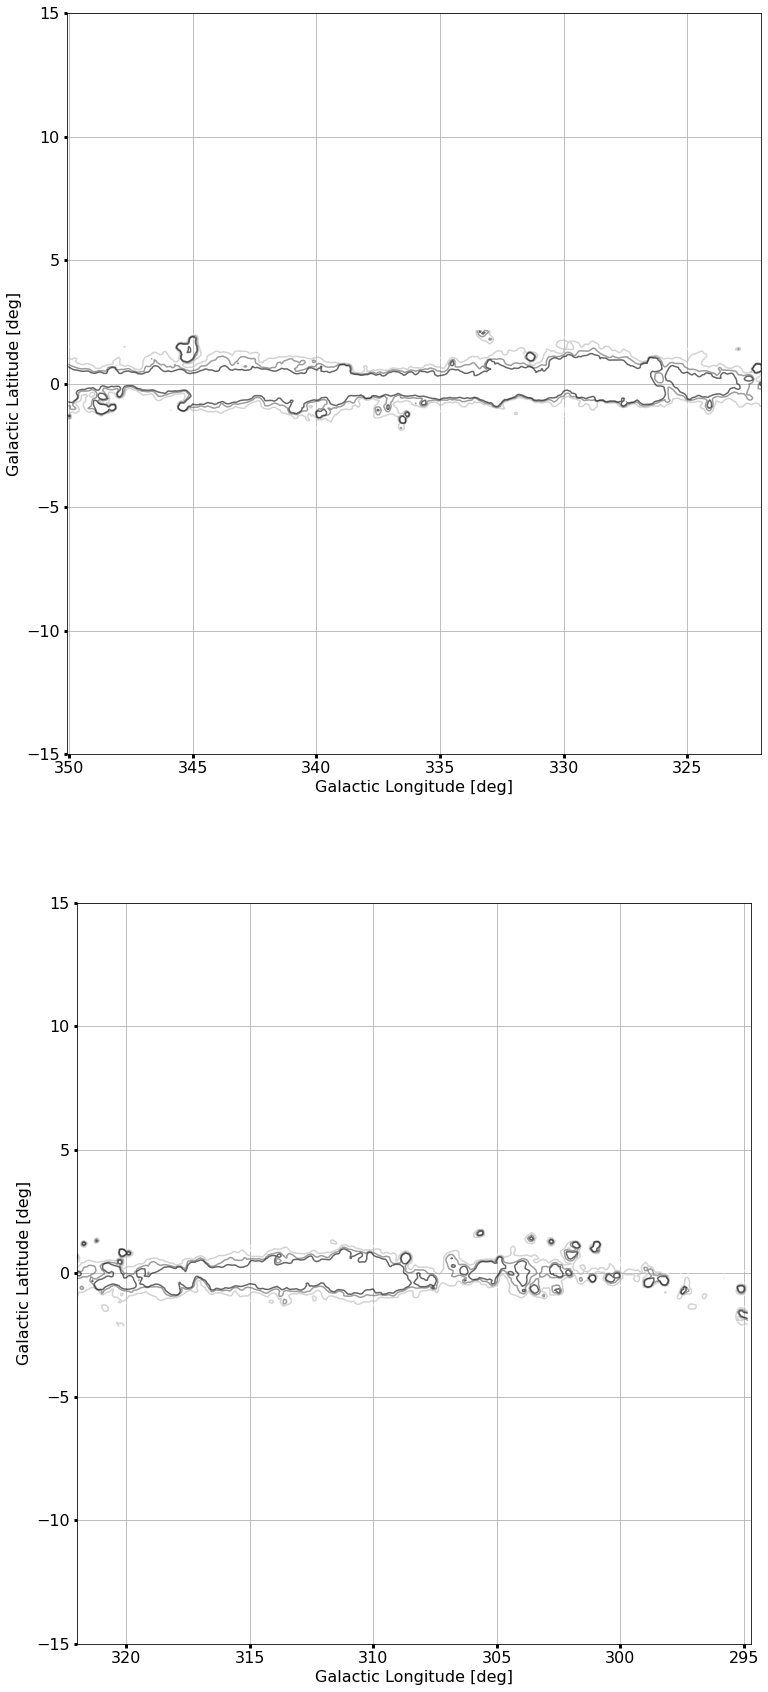

In [49]:
fig = plt.figure(figsize=(30,30))

ax = fig.add_subplot(211,aspect='equal')

#ax.plot(VVVIRGC['l'],VVVIRGC['b'],'.',c='k',markeredgecolor='w',alpha=0.5,label='VVVIRGC')
#ax.plot(TwoMRS['GLON'],TwoMRS['GLAT'],'.',c='k',label="2MRS")
#ax.plot(schroder19['l'],schroder19['b'],'^',c='k',label="Schroder19")
#ax.plot(said['l'],said['b'],'v',c='k',label='Said16')
ax.contour(dust['xi'], dust['yi'], dust['zi'],levels=[11,15,20,25],origin='lower',alpha=0.6,cmap='gist_yarg')
#norm = plot_grupos(ax)

ax.set_xlim(VVVIRGC['l'].max(),322.0)
ax.set_ylim(-15,15)
ax.set_xlabel('Galactic Longitude [deg]',fontsize=16)
ax.set_ylabel('Galactic Latitude [deg]',fontsize=16);
ax.tick_params(labelsize=16, width=3)
ax.grid(True)
#ax.legend()
ax = fig.add_subplot(212,aspect='equal')

#ax.plot(VVVIRGC['l'],VVVIRGC['b'],'.',c='k',markeredgecolor='w',alpha=0.5,label='VVVIRGC')
#ax.plot(TwoMRS['GLON'],TwoMRS['GLAT'],'.',c='k',label="2MRS")
#ax.plot(schroder19['l'],schroder19['b'],'^',c='k',label="Schroder19")
#ax.plot(said['l'],said['b'],'v',c='k',label='Said16')
ax.contour(dust['xi'], dust['yi'], dust['zi'],levels=[11,15,20,25],origin='lower',alpha=0.6,cmap='gist_yarg')
#norm = plot_grupos(ax)

ax.set_xlim(322.0,VVVIRGC['l'].min())
ax.set_ylim(-15,15)
ax.set_xlabel('Galactic Longitude [deg]',fontsize=16)
ax.set_ylabel('Galactic Latitude [deg]',fontsize=16);
ax.tick_params(labelsize=16, width=3)
#ax.legend()
ax.grid(True)

#cax = plt.axes([0.93, 0.15, 0.01, 0.7])
#cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=plt.cm.jet),cax=cax,ticks=[5,10,30,91])
#cbar.ax.set_yticklabels(['5','10','30','91'])
#cbar.set_label('Number of members')